## Cleaning Scraped Data From Discord

In [610]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import re
import spacy

In [480]:
del Df
Df=pd.read_csv('../data/raw_scraped_data/scrapedQ8k.csv')

In [5]:
pd.set_option('display.max_colwidth', None)  # Show all text in each cell without truncation

In [477]:
df
#a way to check messages quick: input the id at the end of this link      V V V V V V <---here
https://discord.com/channels/464539978442211328/464539978442211330/1225926944730644651

,id,content
0,1226204393271984148,What are good search engines or sites to use when troubleshooting ML and DL code?
1,1226172467416924253,"Thanks. What would it take to attach a GPU if I wanted to, and which would you recommend?"
2,1226171094390669322,Hello. I am interested in training and fine-tuning LLMs. I have a MacBook Pro but no GPU. Does anyone have suggestions on a GPU I should get for a Mac to learn how to train and fine-tune? Thanks.
3,1226155505148235836,does scraping discord using python requests get you banned? i looked at their TOS and it's pretty vague. it only talks about user data and using widgets?? but nothing on messages
4,1226134654948479069,How popular is SAS in data science?
...,...,...
8009,696412216689164349,how often do you work with CSVs? or doy ou generally connect directly to data sources like databases?
8010,696085245354704916,"i mean, how to even interpret the global value? It seems like it's too crude to be of use"
8011,696047913964404817,"Hey so quick question. When looking at the data for COVID19, to get an “accurate” survival rate, you should do deaths / recovered+deaths right? Or is there a better way? There’s an image going around that seem to be portraying 98.4% as the survivability rate and I don’t know where they’re getting that from. I know it’s probably false though."
8012,695987625517121566,"my code works this way,but if i actually try to replace max_change with its actual value it doesnt work, why is that?"


## Ch-0:Word Cloud


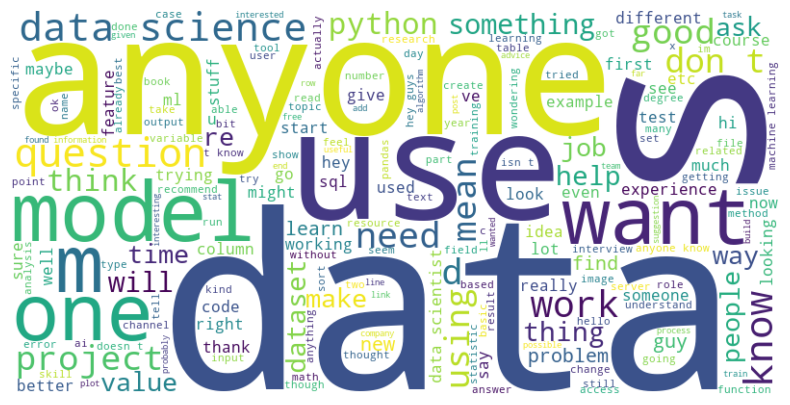

In [579]:
from wordcloud import WordCloud

text_data = " ".join(Df['content'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
del text_data

---------
## Ch-01:Normalize the Data / Cleaning

In [482]:
Df.tail(5)

,id,content
8009,696412216689164349,how often do you work with CSVs? or doy ou generally connect directly to data sources like databases?
8010,696085245354704916,"i mean, how to even interpret the global value? It seems like it's too crude to be of use"
8011,696047913964404817,"Hey so quick question. When looking at the data for COVID19, to get an “accurate” survival rate, you should do deaths / recovered+deaths right? Or is there a better way? There’s an image going around that seem to be portraying 98.4% as the survivability rate and I don’t know where they’re getting that from. I know it’s probably false though."
8012,695987625517121566,"my code works this way,but if i actually try to replace max_change with its actual value it doesnt work, why is that?"
8013,695386093515833404,<@!338859989944762370> what are you talking about?


#### Ch01A-lower case:

In [483]:
Df['content']=Df['content'].apply(lambda x: x.lower() if isinstance(x,str) else x)
Df.head(5)

,id,content
0,1226204393271984148,what are good search engines or sites to use when troubleshooting ml and dl code?
1,1226172467416924253,"thanks. what would it take to attach a gpu if i wanted to, and which would you recommend?"
2,1226171094390669322,hello. i am interested in training and fine-tuning llms. i have a macbook pro but no gpu. does anyone have suggestions on a gpu i should get for a mac to learn how to train and fine-tune? thanks.
3,1226155505148235836,does scraping discord using python requests get you banned? i looked at their tos and it's pretty vague. it only talks about user data and using widgets?? but nothing on messages
4,1226134654948479069,how popular is sas in data science?


-------
#### Ch01B- removing misc.

In [484]:
#regex pattern to look for https followed by non white space
Df['content']=Df['content'].replace('(http://)\S+',' ',regex=True) 
Df['content']=Df['content'].replace('(https://)\S+',' ',regex=True) #regex pattern to look for https followed by non white space

In [485]:
#Removing Code ```.*?```
Df['content']=Df['content'].replace('```.*?```',' ',regex=True) 

In [486]:
#removing /n 
Df['content']=Df['content'].replace('(\\n)',' ',regex=True) 

In [487]:
#<(?<=\<).*> removing mentions and replies
Df['content']=Df['content'].replace('<(?<=\<).*>',' ',regex=True)  

In [488]:
#regex pattern:[^A-Za-z0-9?\s] negative pattern that only allows letter, number, and spaces and question mark
Df['content']=Df['content'].replace('[^A-Za-z0-9?\s]',' ',regex=True)

In [500]:
#Removing 4 or more digits  (\d{4,})
Df['content']=Df['content'].replace('(\d{4,})',' ',regex=True) 
Df['content']=Df['content'].replace('(\d+\s\d+)',' ',regex=True)

In [501]:
#removing spaces 2 or more
Df['content']=Df['content'].replace('(\s{2,})',' ',regex=True) 

In [499]:
Df.sample(5)

,id,content
3584,1125817215707521105,why are you thinking of switching to those roles after 5 years in php? just curious if you are comfortable sharing
5742,924500934099349544,can t you just do a bar chart? seems it d be pretty easy to read
836,1189636416620204094,how many gigs do you have on average in dataset?
1312,1164328491400036494,hi i am currently working on a binary classification model for a highly imbalanced dataset with lots of missing values in there i tried using multiple techniques for resampling random smote and smotetomak and imputation mice as well as a bit of tweaking of class weights and loss function but still i am not able to get higher than this catboost accuracy 0 precision recall f1 score support 0 0 0 95 0 87 0 91 1 0 0 36 0 62 0 46 573 accuracy 0 84 macro avg 0 66 0 74 0 68 weighted avg 0 89 0 84 0 86 any ideas on what can i also try considering such results and above mentioned trials?
7831,715625142327181383,you mean look at the dimension with the highest regression coefficient and then look at the loading weight to see which individual predictor influenced that particular dimension the most?


In [508]:
Df[Df['id']==1164328491400036494]

,id,content
1312,1164328491400036494,hi i am currently working on a binary classification model for a highly imbalanced dataset with lots of missing values in there i tried using multiple techniques for resampling random smote and smotetomak and imputation mice as well as a bit of tweaking of class weights and loss function but still i am not able to get higher than this catboost accuracy 0 precision recall f1 score support 573 accuracy macro avg weighted avg any ideas on what can i also try considering such results and above mentioned trials?


#### Ch01D-Removing Duplicates

In [ ]:
Df[Df['id'].duplicated()]

In [505]:
Df = Df.drop_duplicates(subset=['id'], keep='first')

In [507]:
Df[Df['id']==1164328491400036494] #checking for duplicates 

,id,content
1312,1164328491400036494,hi i am currently working on a binary classification model for a highly imbalanced dataset with lots of missing values in there i tried using multiple techniques for resampling random smote and smotetomak and imputation mice as well as a bit of tweaking of class weights and loss function but still i am not able to get higher than this catboost accuracy 0 precision recall f1 score support 573 accuracy macro avg weighted avg any ideas on what can i also try considering such results and above mentioned trials?


In [509]:
Df.reset_index(drop=True,inplace=True)


In [679]:
#backup
Df.to_csv('../backup/Lemmatized6k.csv',index=False)

In [907]:
#backup
Df.to_csv('../backup/finalcleaned6-7k.csv',index=False)

-----

--------
# Using Spacy to perform Preprocessing

In [ ]:
!python -m spacy download en_core_web_md

In [319]:
from spacy import displacy 
nlp=spacy.load('en_core_web_md')#using the md model because it has word embeddings

In [512]:
#loading our dataframe into the spacy doc object

def docFeeder(text):
    doc=nlp(text)
    #inb4 process..

    return doc

docs=[]#spacy doc object of same len as our dataset. containing the text=>doc object of each row
for text in Df['content']:
    doc=docFeeder(text)
    docs.append(doc)
    


In [513]:
#checking the dimensions of both Df and docs before perfoming any mapping operations
#Df.reset_index()
print('len of docs',len(docs))
print('len of Df',len(Df))
print('shape of Df ',Df.shape)
print('its a list, so no shape')

print(docs[0])

len of docs 6714
len of Df 6714
shape of Df  (6714, 2)
its a list, so no shape
what are good search engines or sites to use when troubleshooting ml and dl code?


-----
## Feature Engineering using Spacy doc object


In [532]:
#sentence count
for index in range(len(docs)-1): #index for each doc object / row 
    sentCount=0
    for sentence in docs[index].sents: # all sentences in that row/doc object
        sentCount+=1
    Df['sentenceCount']=Df.index.map(lambda x: len(list(docs[x].sents)))       

In [563]:
tokenCount=[]
for token in docs:
    tokenCount.append(len(token))
    
    
Df['tokenCount']=tokenCount

In [447]:
Df.sort_values(by='sentenceCount',ascending=False).head(2)

,id,content,wordCount,sentenceCount
693,1197556653445349547,i want to use it in regression it is best? necessary? to do a log transformation first to get it into a gaussian form depends you can do other transformation like scaling and log but if your data is skewed already how good can it be? what is your objective? to get a better accuracy score? or do a hypothesis test? why not try both side by side to determine the difference? i personally have seen log transformation do very well for clustering for linear models could very well do the same but it depends on what your y is,100,9
1274,1163914937215766578,my go to approach is what domain specific things you like reading in news? sports? business ?entertainment etc ? you might be able to think where you can leverage data in that domain and how could you enhance the capabilities? what makes you more curious about that domain ? what and how you wish to contribute? more non technically or technically? what do you feel ? tech devops mlops de mle nontechnical ba da these roles just for the more inclined they does both tech n nontechnical stuff it s just what people enjoy more,95,9


-----
## lemmatization :

In [667]:
# Normalizing content using spacy's lemmatization
lemmatized=[]
for index in range(len(docs)):
    temp=''
    for token in docs[index]:
        temp+=''.join(token.lemma_+' ')
    lemmatized.append(temp)
    del temp



Df['lemmatized']=lemmatized     




In [673]:
Df.sample(5)

,id,content,sentenceCount,tokenCount,lemmatized
5094,860058867031212032,other than free for all help are the other channels under topics the pro channels?,1,16,other than free for all help be the other channel under topic the pro channel ?
4471,922258059869442089,did you look at datastudio?,1,6,do you look at datastudio ?
5316,843928300668977213,it s ok don t worry do you think this would be good for starting out with data analytics?,1,20,it s ok don t worry do you think this would be good for start out with datum analytic ?
4482,921149318151417916,did anyone get me something for xmas?,1,8,do anyone get I something for xmas ?
4525,916046261541556234,what about it?,1,4,what about it ?


----
### Ch02-Matchers

In [681]:
from spacy.matcher import Matcher

In [744]:
Df[Df['content'].str.contains('anyone')].sample(5)

,id,content,sentenceCount,tokenCount,lemmatized
5079,860433302515089408,hi all i was looking at hugging face and was wondering if anyone here has used it before? how do they compare to something like spacy?,2,28,hi all I be look at hug face and be wonder if anyone here have use it before ? how do they compare to something like spacy ?
6076,769086946588098561,anyone know of any courses that covers prescriptive analytics?,1,10,anyone know of any course that cover prescriptive analytic ?
4535,914446139837804585,anyone here used microsoft foxpro?,1,6,anyone here use microsoft foxpro ?
1587,1151592132474306721,hey i got another question for yall if anyone can help this more for my job currently lets say all the data i can get is from extracting csvs only i keep then all in one place and automated the cleanings but its getting too big how would you guys proceed with importing this to lets say mysql so instead connecting to an api since i have to extract a csv file daily if i import my csv file to mysql do i have to update and keep importing daily or when i input my extracted data into the csv file where im storing everything does it automatically update mysql database as well how would you guys proceed with this?,1,123,hey I get another question for you all if anyone can help this more for my job currently let say all the datum I can get be from extract csvs only I keep then all in one place and automate the cleaning but its get too big how would you guy proceed with import this to let say mysql so instead connect to an api since I have to extract a csv file daily if I import my csv file to mysql do I have to update and keep import daily or when I input my extract datum into the csv file where I m store everything do it automatically update mysql database as well how would you guy proceed with this ?
4777,890266325589569586,has anyone ever done the quanthub coding questions for mckinsey data science internship?,1,14,have anyone ever do the quanthub code question for mckinsey data science internship ?


In [789]:
testDF=pd.DataFrame(columns=['index','content','token','dep'])


In [790]:
#new dataframe to house rows containing "anyone"
for index in range(len(docs)):
    temp=''
    for token in docs[index]:
        if token.text == 'anyone':
            
            testDF.loc[len(testDF)]=[index,docs[index].text,token.text,token.dep_]
        
    

In [898]:
testDF.sample(5)

,index,content,token,dep
866,6692,hi anyone trying the kaggle covid 19 challegenge?,anyone,npadvmod
404,3760,does anyone know specific ai machine learning and data science beginner topics? i m new to that field and i want to learn,anyone,nsubj
446,4022,anyone has experienced infosys consultants regarding ds? management is considering them,anyone,nsubj
495,4294,does anyone here have kyc analytics or ds experience?,anyone,nsubj
133,1530,has anyone tried the wps office free excel in data analyst? i want to use that because it s free but i don t sure it can work well in data analyst,anyone,nsubj


In [732]:
testDF['dep'].unique()
#this shows that the word anyone can have many dependencies while still relatively maintaining the same meaning

array(['nsubj', 'ROOT', 'appos', 'pobj', 'attr', 'npadvmod', 'nsubjpass',
       'compound', 'dobj', 'conj', 'ccomp'], dtype=object)

In [768]:
testDF[testDF['dep']=='dobj'].sample()

,content,token,dep
785,hey guys anyone pro in analytics? maybe you can help me out here i m stuck with this for 12 days,anyone,dobj


-----
#### sandbox to test pattern:


In [814]:
#testing patterns:
for token in docs[6320]:
    print(token.text,'----',token.pos_)

anyone ---- PRON
here ---- ADV
use ---- VERB
the ---- DET
jupytab ---- NOUN
library ---- NOUN
for ---- ADP
python ---- NOUN
? ---- PUNCT


In [897]:
text="""how can i do this?
who here can herlp with ?
hello anyone pls help?
hello anyone here can help with how to do X Y Z?
what anyone know how resource i can get flat average
lines onto this line column chart in powerbi? Is there anyone
who can assist with this issue? what can you do can assist with this issue?
"""


pattern = [
    {"IS_SENT_START":True,
    "LOWER":{"IN":['anyone','any1','any one','anybody','is there','are there any']}}
]
 

matcher = Matcher(nlp.vocab)
matcher.add("PERMISSIONQ", [pattern])
doc4 = nlp(text)
matches = matcher(doc4)
print (len(matches))
nlp.analyze_pipes()
  
for match_id, start, end in matches:
    matched_span = doc4[start:end]
    print(matched_span.text)

0


### Outliers

In [578]:
Df.describe()

,id,sentenceCount,tokenCount
count,6.714000e+03,6714.000000,6714.000000
mean,1.012436e+18,1.625559,28.649240
std,1.597163e+17,1.022221,33.203845
min,6.953861e+17,1.000000,1.000000
25%,8.649150e+17,1.000000,10.000000
50%,1.059308e+18,1.000000,18.000000
75%,1.148620e+18,2.000000,34.000000
max,1.226204e+18,14.000000,389.000000


In [585]:

# Calculate the interquartile range (IQR)
Q1 = Df['tokenCount'].quantile(0.25)
Q3 = Df['tokenCount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliersUpper = Df[ (Df['tokenCount'] > upper_threshold)]
outliersLower = Df[(Df['tokenCount'] < lower_threshold) ]

# Count outliers
num_outliers = len(outliersUpper)
print("Number of outliers upper:", num_outliers)

num_outliers = len(outliersLower)
print("Number of outliers lower:", num_outliers)
outliersUpper

Number of outliers upper: 531
Number of outliers lower: 0


,id,content,sentenceCount,tokenCount
6,1226066823519408219,hallo long time i ask no doubt i am trying to build a personal project around urls to fetch some info some as names addresses contact information from it etc at the start i had some similar structuring so i got some data using parsing libraries and regex but now all page structures are different i thought of just passing down visible text to legendary gpt4 api or even batch wise to gpt and ask it to parse it but as per my calculations it will become costly at what scale i am trying to do it can t compromise with scale have already done another issue is that it also returns bad data sometimes is there a better free or even cheaper approach for a college student to parse such useful information using ai or ml?,3,138
21,1225924327145476129,hi wanted to say that i spent a lot of time learning c c at the university even made my own projects now i wanna ask how relevant useful are the c skills for a data scientist? i feel like c gave me a good idea about programming languages functionality under the hood for instance how memory allocation works how data types are implemented etc how useful is this knowledge in ds? will i ever have an opportunity to use c ?,4,84
23,1225831882420260894,hello i study computer science at the university thus i work worked over plenty of different projects that being said i have a question related to making my data science portfolio should i include the games i coded in c the websites i made in html css etc into my data science portfolio? for instance i feel like i got a lot of oop and applied math experience while making c games but i don t know how relevant it is to my data science portfolio,4,87
26,1225714971879407737,i actually went through different job vacancies just out of curiosity what i noticed is that every company uses it s own tools some companies use tensor some use tableau some sas some data robot some ibm congos etc that being said every company wants you to either be proficient or at least have experience with the software mentioned earlier am i like supposed to know how to work with all of the tools?,1,75
58,1225278973043413082,hey guys is it possible to do a prediction interval for the forecasts of an arima model and if so how would i go about implementing that in python? i know i also have to check for the normal distribution of the residuals but that s as far as i know and i m not entirely sure how to do that in python either any good videos or articles that might help me?,2,75
...,...,...,...,...
6680,700895820719063041,anyone have any advice on consulting freelancing? i was laid off this week and i m considering grad school as a next step but am looking at consulting as a way to provide for myself in the 18 months between now and the earliest i could start a masters im not a full fledged data scientist more fo a hybrid financial analyst who has self taught a lot of stats and ml my specialty is applied predictive analytics using ml to address finance and strategy problems,2,88
6695,698618298694107186,don t forget the cpu cooler didn t see one on the gpu i would ve recommended a or super and save you 500 the ti being does not offer the same value as far as performance cost yes you ll have slightly less performance but you ll have significantly less cost however it does have 11 gb of vram compared to 8 i have a and i have run out of vram when running cnns in tensorflow in the past i m waiting on whatever s next s? to see what vram is included the other options are high vram cards like quadro but those are s 2 storage yeah wow i would ve gotten a m 2 nvme boot drive at 500 gb for around 100 then added other sata ssds as needed 2tb of nvme is expensive,8,143
6696,698361280884637697,also i could use a sanity check on my overall concept i am slowly getting into neural nets and deep learning and want to go further right now i have current gen fully spec d macbook pro as my work comp and a janky 400 laptop that s not even super frien

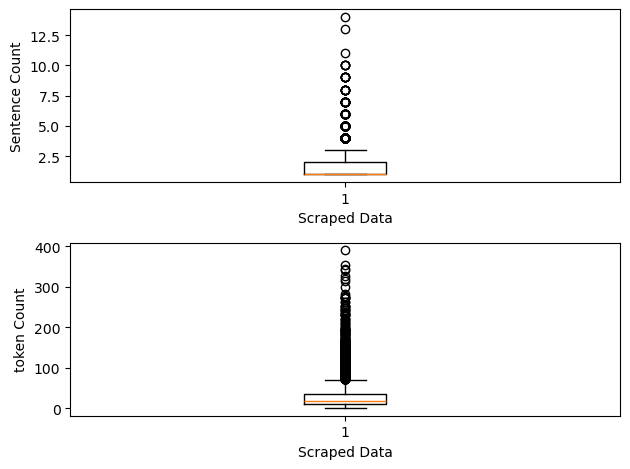

In [577]:
plt.subplot(2,1,1)
plt.boxplot(Df['sentenceCount'])
plt.ylabel('Sentence Count')
plt.xlabel('Scraped Data')

plt.subplot(2,1,2)
plt.boxplot(Df['tokenCount'])
plt.ylabel('token Count')
plt.xlabel('Scraped Data')

plt.tight_layout()
plt.show()